In [1]:
import sys
sys.version

'3.7.3 (v3.7.3:ef4ec6ed12, Mar 25 2019, 22:22:05) [MSC v.1916 64 bit (AMD64)]'

In [34]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

tf.__version__

'2.0.0'

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape

11493376/11490434 [==============================] - 8s 1us/step


(60000, 28, 28)

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

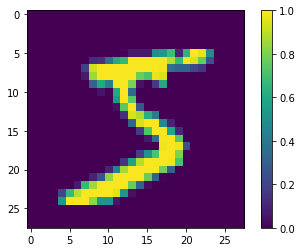

In [8]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

C:\Users\guilh\AppData\Roaming\Python\Python37\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


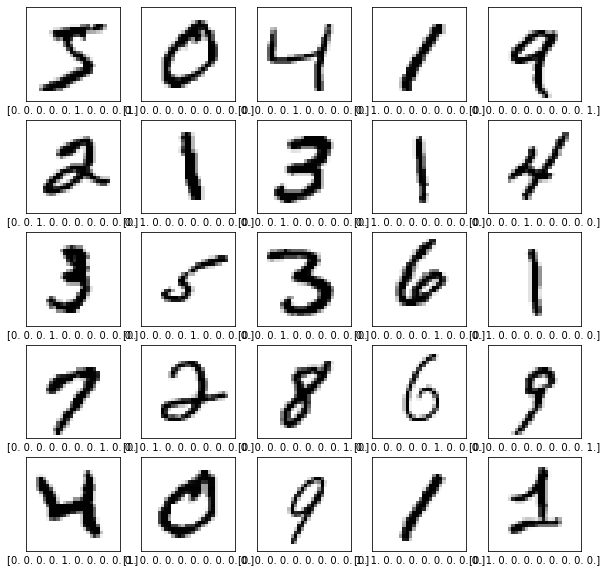

In [9]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])


## Building the learning models

In [37]:
def train_eval_dnn(dnn_model):
    """Simple function to train and evaluate a model defined previously."""
    dnn_model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['acc'])
    history = dnn_model.fit(X_train, y_train, epochs=100)
    test_loss = dnn_model.evaluate(X_test, y_test, verbose=2)
    return history, test_loss


def save_dnn_layers(dnn_model, path=None):
    """Given a DNN model, saves the weights and biases as text files."""
    if path and not os.path.exists(path):
        os.makedirs(path)
    
    weights_biases = keras.backend.eval(dnn_model.weights)

    for i, x in enumerate(weights_biases):
        if i % 2:
            # its a bias vector(odd position)
            fname_prefix = 'bias'
        else:
            # its a weight matrix(even position)
            fname_prefix = 'weights'

        np.savetxt(os.path.join(path, f'{fname_prefix}_{dnn_model.name}_layer{i//2}.npy'),
                   keras.backend.eval(x))

In [ ]:
def build_milp_model(dnn_model):
    pass

### DNN 1 (8+8+8)

In [13]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(10, activation='relu')
], name='model1')

In [14]:
hist, test_loss = train_eval_dnn(model1)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0908 - acc: 0.2206
Epoch 2/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0822 - acc: 0.3632
Epoch 3/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0744 - acc: 0.4861
Epoch 4/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0678 - acc: 0.5457
Epoch 5/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0616 - acc: 0.5986
Epoch 6/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0562 - acc: 0.6377
Epoch 7/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0518 - acc: 0.6803
Epoch 8/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0480 - acc: 0.7210
Epoch 9/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0449 - acc: 0.7519
Epoch 10/100
60000/60000 [========================

In [15]:
predictions = model1.predict(X_test)
np.argmax(predictions, axis=1)[:25]

array([7, 2, 1, 0, 4, 1, 4, 9, 4, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4], dtype=int64)

In [16]:
np.argmax(y_test, axis=1)[:25]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4], dtype=int64)

In [17]:
(np.argmax(predictions, axis=1) != np.argmax(y_test, axis=1)).sum()

909

In [36]:
save_dnn_layers(model1, 'dnn1')

### DNN 2 (8+8+8+8+8+8)

In [19]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(10, activation='relu')
], name='model2')

In [20]:
hist, test_loss = train_eval_dnn(model2)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0978 - acc: 0.0957
Epoch 2/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0954 - acc: 0.1082
Epoch 3/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0876 - acc: 0.1977
Epoch 4/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0859 - acc: 0.2286
Epoch 5/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0850 - acc: 0.2606
Epoch 6/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0843 - acc: 0.2742
Epoch 7/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0837 - acc: 0.2902
Epoch 8/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0831 - acc: 0.2965
Epoch 9/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0825 - acc: 0.3021
Epoch 10/100
60000/60000 [========================

In [21]:
predictions = model2.predict(X_test)
np.argmax(predictions, axis=1)[:25]

array([7, 0, 0, 0, 4, 0, 4, 9, 6, 4, 0, 6, 9, 0, 3, 5, 9, 7, 0, 4, 9, 6,
       6, 5, 4], dtype=int64)

In [22]:
np.argmax(y_test, axis=1)[:25]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4], dtype=int64)

In [23]:
(np.argmax(predictions, axis=1) != np.argmax(y_test, axis=1)).sum()

3069

In [38]:
save_dnn_layers(model2, 'dnn2')

### DNN 3 (20+10+8+8)

In [39]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(10, activation='relu')
], name='model3')

In [40]:
hist, test_loss = train_eval_dnn(model3)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0890 - acc: 0.2479
Epoch 2/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0759 - acc: 0.4214
Epoch 3/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0670 - acc: 0.5137
Epoch 4/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0612 - acc: 0.5893
Epoch 5/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0561 - acc: 0.6349
Epoch 6/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0516 - acc: 0.6625
Epoch 7/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0481 - acc: 0.6812
Epoch 8/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0455 - acc: 0.6976
Epoch 9/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0435 - acc: 0.7114
Epoch 10/100
60000/60000 [========================

In [41]:
predictions = model3.predict(X_test)
np.argmax(predictions, axis=1)[:25]

array([7, 0, 1, 0, 4, 1, 4, 9, 4, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4], dtype=int64)

In [42]:
np.argmax(y_test, axis=1)[:25]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4], dtype=int64)

In [43]:
(np.argmax(predictions, axis=1) != np.argmax(y_test, axis=1)).sum()

1601

In [44]:
save_dnn_layers(model3, 'dnn3')